#### Notes:

- Preparation
    - Look at 99s 888  (double check for other non-relevevant data)  (Sergey)
    - BMI/100 (Sergey)
    
    - Scale / Normalize / Standartize data? (research)  (Spring)
    - One hot encoding ? (research)  (Spring)
    
- Need to choose appropriate features
    - Correlation coefficient (13)
    - Lasso ? (research if need to)
***
- Need to choose the best model for classification:
    - Calc. cross validation score:
        - Select training : test sets 80:20
        - Select KFold validation (10 folds) on training set 
            - Logistic Regression (Camm)
            - SVM (resarch) (Sergey)
            
            
            
            
- We'll compile presentation based on analysis results


#### Rubric:
- Point breakdown for presentation - 15 points
    - Review of problem definition and data description
    - Data preparation process
    - Analysis approaches
    - Analysis results
    - Challenges & solutions
    - Insights gained
    - Future work
    - All team members present


# DSE-230 Final Project
## Diabetes Risk Prediction from Personal Health Indicators
### Team 3
#### Chunxia Tong  
#### Camm Perera
#### Sergey Gurvich

***
##### Table of Contents:

* [1. Problem Definition](#1_problem_definition)
* [2. Project Setup](#2_project_setup)
    * [2.1 Imports](#2_1_imports)
    * [2.2 Start Spark Session](#2_2_start_spark_session)
    * [2.3 Read Data](#2_3_read_data)
        * [](#)
        * [](#)
        * [](#)
***

### 1. Problem Definition <a class="anchor" id="1_problem_definition"></a>
_bla bla bla..._  
git: https://github.com/spring-camm-sergey/dse230  
dataset: https://www.cdc.gov/brfss/annual_data/annual_2020.html  
_bla bla bla..._  

### 2. Project Setup <a class="anchor" id="2_project_setup"></a>
#### 2.1 Imports <a class="anchor" id="2_1_imports"></a>

In [1]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplaslotlib.pyplot as plt

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan,when,count

#### 2.2 Start Spark Session <a class="anchor" id="2_2_start_spark_session"></a>

In [2]:
conf = pyspark.SparkConf().setAll([('spark.master', 'local[*]'),
                                   ('spark.app.name', 'Basic Setup')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()
spark.version

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-05-16 04:01:27,114 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'3.2.1'

#### 2.3 Read Data <a class="anchor" id="2_3_read_data"></a>

_Place the main CSV file into HDFS:_

_hadoop fs -copyFromLocal work/Project/dse230/original_dataset/BRFSS_2020_DATA_NAMES.csv /_

In [3]:
# %%time
orig_df = spark.read.option("header", True).csv('hdfs:///BRFSS_2020_DATA_NAMES.csv', inferSchema=True)

In [4]:
labels_map = {
'ACEDEPRS' : 'LIVE WITH ANYONE DEPRESSED, MENTALLY ILL, OR SUICIDAL?',
'ACEDIVRC' : 'WERE YOUR PARENTS DIVORCED/SEPERATED?',
'ACEDRINK' : 'LIVE WITH A PROBLEM DRINKER/ALCOHOLIC?',
'ACEDRUGS' : 'LIVE WITH ANYONE WHO USED ILLEGAL DRUGS OR ABUSED PRESCRIPTIONS?',
'ACEHURT1' : 'HOW OFTEN DID A PARENT PHYSICALLY HURT YOU IN ANY WAY?',
'ACEHVSEX' : 'HOW OFTEN DID ANYONE EVER FORCE YOU TO HAVE SEX?',
'ACEPRISN' : 'LIVE WITH ANYONE WHO SERVED TIME IN PRISON OR JAIL?',
'ACEPUNCH' : 'HOW OFTEN DID YOUR PARENTS BEAT EACH OTHER UP?',
'ACESWEAR' : 'HOW OFTEN DID A PARENT SWEAR AT YOU?',
'ACETOUCH' : 'HOW OFTEN DID ANYONE EVER TOUCH YOU SEXUALLY?',
'ACETTHEM' : 'HOW OFTEN DID ANYONE MAKE YOU TOUCH THEM SEXUALLY?',
'ADDEPEV3' : '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
'ALCDAY5' : 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
'ASTHMA3' : 'EVER TOLD HAD ASTHMA',
'ASTHNOW' : 'STILL HAVE ASTHMA',
'AVEDRNK3' : 'AVG ALCOHOLIC DRINKS PER DAY IN PAST 30',
'BIRTHSEX' : 'ARE YOU MALE OR FEMALE?',
'BLDSTOL1' : 'EVER HAD BLOOD STOOL TEST USING HOME KIT',
'BLDSUGAR' : 'HOW OFTEN CHECK BLOOD FOR GLUCOSE',
'BLIND' : 'BLIND OR DIFFICULTY SEEING',
'CADULT1' : 'ARE YOU 18 YEARS OF AGE OR OLDER?',
'CAREGIV1' : 'PROVIDED REGULAR CARE FOR FAMILY OR FRIEND',
'CASTHDX2' : 'HLTH PRO EVER SAID CHILD HAS ASTHMA',
'CASTHNO2' : 'CHILD STILL HAVE ASTHMA?',
'CCLGHOUS' : 'DO YOU LIVE IN COLLEGE HOUSING?',
'CDASSIST' : 'NEED ASSISTANCE WITH DAY-TO_DAY ACTIVITIES DUE TO CONFUSION OR MEMORY LOSS',
'CDDISCUS' : 'HAVE YOU DISCUSSED YOUR CONFUSION OR MEMORY LOSS WITH A HEALTH CARE PROFESSIONAL?',
'CDHELP' : 'WHEN YOU NEED HELP WITH DAY-TO-DAY ACTIVITIES ARE YOU ABLE TO GET IT',
'CDHOUSE' : 'GIVEN UP DAY-TO-DAY CHORES DUE TO CONFUSION OR MEMORY LOSS',
'CDSOCIAL' : 'DOES CONFUSION OR MEMORY LOSS INTERFERE WITH WORK OR SOCIAL ACTIVITIES',
'CELLFON5' : 'IS THIS A CELL PHONE?',
'CELLSEX' : 'ARE YOU MALE OR FEMALE?',
'CELPHONE' : 'CELLULAR TELEPHONE',
'CHCCOPD2' : '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
'CHCKDNY2' : 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
'CHCOCNCR' : '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
'CHCSCNCR' : '(EVER TOLD) YOU HAD SKIN CANCER?',
'CHECKUP1' : 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
'CHILDREN' : 'NUMBER OF CHILDREN IN HOUSEHOLD',
'CHKHEMO3' : 'TIMES CHECKED FOR GLYCOSYLATED HEMOGLOBIN',
'CIMEMLOS' : 'HAVE YOU EXPERIENCED CONFUSION OR MEMORY LOSS THAT IS HAPPENING MORE OFTEN OR IS GETTING WORSE?',
'CNCRAGE' : 'AGE TOLD HAD CANCER',
'CNCRDIFF' : 'HOW MANY TYPES OF CANCER?',
'CNCRTYP1' : 'TYPE OF CANCER',
'COLGHOUS' : 'DO YOU LIVE IN COLLEGE HOUSING?',
'COLGSEX' : 'ARE YOU MALE OR FEMALE?',
'COLNSCPY' : 'HAVE YOU EVER HAD A COLONOSCOPY?',
'COLNTEST' : 'HOW LONG HAS IT BEEN SINCE YOU HAD COLONOSCOPY?',
'CPDEMO1B' : 'DO YOU HAVE A CELL PHONE FOR PERSONAL USE?',
'CRGVALZD' : 'DOES PERSON BEING CARED FOR HAVE ALZHEIMER¥S DISEASE?',
'CRGVEXPT' : 'DO YOU EXPECT TO HAVE A RELATIVE YOU WILL NEED TO PROVIDE CARE FOR?',
'CRGVHOU1' : 'MANAGED HOUSEHOLD TASKS',
'CRGVHRS1' : 'HOW MANY HOURS DO YOU PROVIDE CARE FOR PERSON?',
'CRGVLNG1' : 'HOW LONG PROVIDED CARE FOR PERSON.',
'CRGVPER1' : 'MANAGED PERSONAL CARE',
'CRGVPRB3' : 'WHAT IS THE MAJOR HEALTH PROBLEM, ILLNESS, DISABILITY FOR CARE FOR PERSON?',
'CRGVREL4' : 'RELATIONSHIP OF PERSON TO WHOM YOU ARE GIVING CARE?',
'CSRVCLIN' : 'PARTICIPATE IN CLINICAL TRIAL AS PART OF CANCER TREATMENT?',
'CSRVCTL2' : 'IS PAIN UNDER CONTROL?',
'CSRVDEIN' : 'EVER DENIED INSURANCE COVERAGE BECAUSE OF YOUR CANCER?',
'CSRVDOC1' : 'WHAT TYPE OF DOCTOR PROVIDES MAJORITY OF YOUR CARE',
'CSRVINSR' : 'DID HEALTH INSURANCE PAY FOR ALL OF YOUR CANCER TREATMENT',
'CSRVINST' : 'INSTRUCTIONS WRITTEN OR PRINTED',
'CSRVPAIN' : 'CURRENTLY HAVE PHYSICAL PAIN FROM CANCER OR TREATMENT?',
'CSRVRTRN' : 'EVER RECEIVE INSTRUCTIONS FROM A DOCTOR FOR FOLLOW-UP CHECK-UPS',
'CSRVSUM' : 'DID YOU RECEIVE A SUMMARY OF CANCER TREATMENTS RECEIVED',
'CSRVTRT3' : 'CURRENTLY RECEIVING TREATMENT FOR CANCER',
'CSTATE1' : 'DO YOU CURRENTLY LIVE IN  ____(STATE)____?',
'CTELENM1' : 'CORRECT TELEPHONE NUMBER?',
'CTELNUM1' : 'CORRECT PHONE NUMBER?',
'CVDCRHD4' : 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
'CVDINFR4' : 'EVER DIAGNOSED WITH HEART ATTACK',
'CVDSTRK3' : 'EVER DIAGNOSED WITH A STROKE',
'DEAF' : 'ARE YOU DEAF OR DO YOU HAVE SERIOUS DIFFICULTY HEARING?',
'DECIDE' : 'DIFFICULTY CONCENTRATING OR REMEMBERING',
'DIABAGE3' : 'AGE WHEN TOLD DIABETES',
'DIABEDU' : 'EVER TAKEN CLASS IN MANAGING DIABETES',
'DIABETE4' : '(EVER TOLD) YOU HAD DIABETES',
'DIABEYE' : 'EVER TOLD DIABETES HAS AFFECTED EYES',
'DIFFALON' : 'DIFFICULTY DOING ERRANDS ALONE',
'DIFFDRES' : 'DIFFICULTY DRESSING OR BATHING',
'DIFFWALK' : 'DIFFICULTY WALKING OR CLIMBING STAIRS',
'DISPCODE' : 'FINAL DISPOSITION',
'DOCTDIAB' : 'TIMES SEEN HEALTH PROFESSIONAL FOR DIABETES',
'DRNK3GE5' : 'BINGE DRINKING',
'DRNKANY5' : 'DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS',
'DRNKDRI2' : 'DID YOU DRIVE AFTER HAVING TOO MUCH TO DRINK IN THE PAST 30 DAYS?',
'DROCDY3_' : 'COMPUTED DRINK-OCCASIONS-PER-DAY',
'ECIGARET' : 'HAVE YOU EVER USED AN E-CIGARETTE OR OTHER ELECTRONIC ìVAPINGî PRODUCT?',
'ECIGNOW' : 'DO YOU NOW USE E-CIGARETTES, EVERY DAY, SOME DAYS, OR NOT AT ALL?',
'EDUCA' : 'EDUCATION LEVEL',
'EMPLOY1' : 'EMPLOYMENT STATUS',
'EXERANY2' : 'EXERCISE IN PAST 30 DAYS',
'EYEEXAM1' : 'LAST EYE EXAM WHERE PUPILS WERE DILATED',
'FALL12MN' : 'HAD FALL PAST TWELVE MONTHS',
'FALLINJ4' : 'INJURED IN FALL',
'FEETCHK' : 'TIMES FEET CHECK FOR SORES/IRRITATIONS',
'FEETCHK3' : 'HOW OFTEN CHECK FEET FOR SORES OR IRRITATIONS',
'FLSHTMY3' : 'WHEN RECEIVED MOST RECENT SEASONAL FLU SHOT/SPRAY',
'FLUSHOT7' : 'ADULT FLU SHOT/SPRAY PAST 12 MOS',
'FMONTH' : 'FILE MONTH',
'GENHLTH' : 'GENERAL HEALTH',
'HADHYST2' : 'HAD HYSTERECTOMY',
'HADMAM' : 'HAVE YOU EVER HAD A MAMMOGRAM',
'HADPAP2' : 'EVER HAD A PAP TEST',
'HAVARTH4' : 'TOLD HAVE ARTHRITIS',
'HAVECFS' : 'STILL HAVE CHRONIC FATIGUE SYNDROME OR MYALGIC ENCEPHALOMYELITIS',
'HAVEHEPB' : 'TOLD  HAD HEPATITIS B',
'HAVEHEPC' : 'STILL HAVE HEPATITIS C',
'HEIGHT3' : 'REPORTED HEIGHT IN FEET AND INCHES',
'HHADULT' : 'NUMBER OF ADULTS IN HOUSEHOLD',
'HIVRISK5' : 'DO ANY HIGH RISK SITUATIONS APPLY',
'HIVTST7' : 'EVER TESTED H.I.V.',
'HIVTSTD3' : 'MONTH AND YEAR OF LAST HIV TEST',
'HLTHCVR1' : 'PRIMARY HEALTH INSURANCE COVERAGE',
'HLTHPLN1' : 'HAVE ANY HEALTH CARE COVERAGE',
'HOWLONG' : 'HOW LONG SINCE LAST MAMMOGRAM',
'HPLSTTST' : 'HOW LONG SINCE YOUR LAST HPV TEST?',
'HPVADSHT' : 'NUMBER OF HPV SHOTS RECEIVED',
'HPVADVC4' : 'EVER HAD AN H.P.V. VACCINATION?',
'HPVTEST' : 'HAVE YOU EVER HAD AN HPV TEST?',
'HTIN4' : 'COMPUTED HEIGHT IN INCHES',
'HTM4' : 'COMPUTED HEIGHT IN METERS',
'IDATE' : 'INTERVIEW DATE',
'IDAY' : 'INTERVIEW DAY',
'IMFVPLA1' : 'WHERE DID YOU GET YOUR LAST FLU SHOT/VACCINE?',
'IMONTH' : 'INTERVIEW MONTH',
'INCOME2' : 'INCOME LEVEL',
'INSULIN1' : 'NOW TAKING INSULIN',
'IYEAR' : 'INTERVIEW YEAR',
'LADULT1' : 'ARE YOU 18 YEARS OF AGE OR OLDER?',
'LANDLINE' : 'DO YOU ALSO HAVE A LANDLINE TELEPHONE?',
'LANDSEX' : 'ARE YOU MALE OR FEMALE?',
'LASTDEN4' : 'LAST VISITED DENTIST OR DENTAL CLINIC',
'LASTPAP2' : 'HOW LONG SINCE LAST PAP TEST',
'LASTSMK2' : 'INTERVAL SINCE LAST SMOKED',
'LCSCTSCN' : 'DID YOU HAVE A CT OR CAT SCAN?',
'LCSFIRST' : 'HOW OLD WHEN YOU FIRST STARTED SMOKING?',
'LCSLAST' : 'HOW OLD WHEN YOU LAST SMOKED?',
'LCSNUMCG' : 'ON AVERAGE, HOW MANY CIGARETTES DO YOU SMOKE EACH DAY?',
'LSTBLDS4' : 'HOW LONG SINCE YOU HAD BLOOD STOOL TEST?',
'MARIJAN1' : 'DURING THE PAST 30 DAYS, ON HOW MANY DAYS DID YOU USE MARIJUANA OR HASHISH?',
'MARITAL' : 'MARITAL STATUS',
'MAXDRNKS' : 'MOST DRINKS ON SINGLE OCCASION PAST 30 DAYS',
'MEDCOST' : 'COULD NOT SEE DR. BECAUSE OF COST',
'MEDSHEPB' : 'CURRENTLY TAKING MEDICINE FOR HEPATITIS B',
'MENTHLTH' : 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
'MSCODE' : 'METROPOLITAN STATUS CODE',
'NUMADULT' : 'NUMBER OF ADULTS IN HOUSEHOLD',
'NUMHHOL3' : 'HOUSEHOLD TELEPHONES',
'NUMMEN' : 'NUMBER OF ADULT MEN IN HOUSEHOLD',
'NUMPHON3' : 'RESIDENTIAL PHONES',
'NUMWOMEN' : 'NUMBER OF ADULT WOMEN IN HOUSEHOLD',
'PCDMDEC1' : 'WHO MADE THE DECISION WITH YOU TO HAVE PSA TEST?',
'PCPSAAD3' : 'HAS A HEALTH PROFESSIONAL EVER TALKED WITH YOU ABOUT THE ADVANTAGES OF THE PSA TEST?',
'PCPSADE1' : 'WHY WAS PSA TEST DONE?',
'PCPSADI1' : 'HAS A HEALTH PROFESSIONAL EVER TALKED WITH YOU ABOUT THE DISADVANTAGES OF THE PSA TEST?',
'PCPSARE1' : 'HAS A DOCTOR EVER RECOMMENDED THAT YOU HAVE A PSA TEST?',
'PCPSARS1' : 'WHAT WAS THE MAIN REASON YOU HAD THIS PSA TEST?',
'PDIABTST' : 'HAD A TEST FOR HIGH BLOOD SUGAR IN PAST THREE YEARS',
'PERSDOC2' : 'MULTIPLE HEALTH CARE PROFESSIONALS',
'PHYSHLTH' : 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
'PNEUVAC4' : 'PNEUMONIA SHOT EVER',
'POORHLTH' : 'POOR PHYSICAL OR MENTAL HEALTH',
'PREDIAB1' : 'EVER BEEN TOLD YOU HAVE PRE-DIABETES OR BORDERLINE DIABETES',
'PREGNANT' : 'PREGNANCY STATUS',
'PRIRHEPC' : 'WERE YOU TREATED FOR HEPATITIS C PRIOR TO 2015',
'PSATEST1' : 'EVER HAD PSA TEST',
'PSATIME' : 'TIME SINCE LAST PSA TEST',
'PVTRESD1' : 'PRIVATE RESIDENCE?',
'PVTRESD3' : 'DO YOU LIVE IN A PRIVATE RESIDENCE?',
'QSTLANG' : 'LANGUAGE IDENTIFIER',
'QSTVER' : 'QUESTIONNAIRE VERSION IDENTIFIER',
'RCSGENDR' : 'GENDER OF CHILD',
'RCSRLTN2' : 'RELATIONSHIP TO CHILD',
'RENTHOM1' : 'OWN OR RENT HOME',
'RESPSLCT' : 'RESPONDENT SELECTION',
'RMVTETH4' : 'NUMBER OF PERMANENT TEETH REMOVED',
'RSNMRJN1' : 'WHAT WAS THE REASON YOU USED MARIJUANA?',
'SAFETIME' : 'SAFE TIME TO TALK?',
'SDNATEST' : 'HOW LONG SINCE YOU HAD STOOL DNA?',
'SEATBELT' : 'HOW OFTEN USE SEATBELTS IN CAR?',
'SEQNO' : 'ANNUAL SEQUENCE NUMBER',
'SEXVAR' : 'SEX OF RESPONDENT',
'SHINGLE2' : 'HAVE YOU EVER HAD THE SHINGLES OR ZOSTER VACCINE?',
'SIGMSCPY' : 'HAVE YOU EVER HAD A SIGMOIDOSCOPY?',
'SIGMTEST' : 'HOW LONG HAS IT BEEN SINCE YOU HAD SIGMOIDOSCOPY?',
'SLEPTIM1' : 'HOW MUCH TIME DO YOU SLEEP',
'SMOKDAY2' : 'FREQUENCY OF DAYS NOW SMOKING',
'SMOKE100' : 'SMOKED AT LEAST 100 CIGARETTES',
'SOFEMALE' : 'SEXUAL ORIENTATION',
'SOMALE' : 'SEXUAL ORIENTATION',
'STATERE1' : 'RESIDENT OF STATE',
'STOOLDNA' : 'EVER HAD STOOL DNA TEST?',
'STOPSMK2' : 'STOPPED SMOKING IN PAST 12 MONTHS',
'TETANUS1' : 'RECEIVED TETANUS SHOT SINCE 2005?',
'TOLDCFS' : 'TOLD HAD CHRONIC FATIGUE SYNDROME OR MYALGIC ENCEPHALOMYELITIS',
'TOLDHEPC' : 'TOLD HAD HEPATITIS C',
'TRETHEPC' : 'TREATED FOR HEPATITIS C',
'TRNSGNDR' : 'DO YOU CONSIDER YOURSELF TO BE TRANSGENDER?',
'USEMRJN2' : 'DURING THE PAST 30 DAYS, HOW DID YOU PRIMARILY USE MARIJUANA?',
'USENOW3' : 'USE OF SMOKELESS TOBACCO PRODUCTS',
'VCLNTEST' : 'HOW LONG HAS IT BEEN SINCE YOU HAD VIRTUAL COLONOSCOPY?',
'VETERAN3' : 'ARE YOU A VETERAN',
'VIRCOLON' : 'HAVE YOU EVER HAD A VIRTUAL COLONOSCOPY?',
'WEIGHT2' : 'REPORTED WEIGHT IN POUNDS',
'WORKCFS' : 'HOW MANY HOURS A WEEK ARE YOU BEEN ABLE TO WORK',
'WTKG3' : 'COMPUTED WEIGHT IN KILOGRAMS',
'_AGE65YR' : 'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
'_AGE80' : 'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
'_AGEG5YR' : 'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE',
'_AGE_G' : 'IMPUTED AGE IN SIX GROUPS',
'_AIDTST4' : 'EVER BEEN TESTED FOR HIV CALCULATED VARIABLE',
'_ALTETH3' : 'ADULTS AGED 65+ WHO HAVE HAD ALL THEIR NATURAL TEETH EXTRACTED',
'_ASTHMS1' : 'COMPUTED ASTHMA STATUS',
'_BMI5' : 'COMPUTED BODY MASS INDEX',
'_BMI5CAT' : 'COMPUTED BODY MASS INDEX CATEGORIES',
'_CASTHM1' : 'CURRENT ASTHMA CALCULATED VARIABLE',
'_CHISPNC' : 'CHILD HISPANIC, LATINO/A, OR SPANISH ORIGIN CALCULATED VARIABLE',
'_CHLDCNT' : 'COMPUTED NUMBER OF CHILDREN IN HOUSEHOLD',
'_CLLCPWT' : 'FINAL CHILD WEIGHT: LAND-LINE AND CELL-PHONE DATA',
'_CLNSCPY' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A COLONOSCOPY WITHIN THE PAST TEN YEARS',
'_CPRACE' : 'PREFERRED CHILD RACE CATEGORIES',
'_CRACE1' : 'CHILD NON-HISPANIC RACE INCLUDING MULTIRACIAL',
'_CRCREC1' : 'RESPONDENTS AGED 50-75 WHO HAVE FULLY MET THE USPSTF RECOMMENDATIONS',
'_DENVST3' : 'ADULTS WHO HAVE VISITED A DENTIST, DENTAL HYGENIST OR DENTAL CLINIC WITHIN THE PAST YEAR',
'_DRDXAR2' : 'RESPONDENTS DIAGNOSED WITH ARTHRITIS',
'_DRNKDRV' : 'DRINKING AND DRIVING',
'_DRNKWK1' : 'COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK',
'_DUALCOR' : 'DUAL PHONE USE CORRECTION FACTOR',
'_DUALUSE' : 'DUAL PHONE USE CATEGORIES',
'_EDUCAG' : 'COMPUTED LEVEL OF EDUCATION COMPLETED CATEGORIES',
'_EXTETH3' : 'RISK FACTOR FOR HAVING HAD PERMANENT TEETH EXTRACTED',
'_FLSHOT7' : 'FLU SHOT CALCULATED VARIABLE',
'_HCVU651' : 'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE',
'_HISPANC' : 'HISPANIC, LATINO/A, OR SPANISH ORIGIN CALCULATED VARIABLE',
'_IMPRACE' : 'IMPUTED RACE/ETHNICITY VALUE',
'_INCOMG' : 'COMPUTED INCOME CATEGORIES',
'_LLCPWT' : 'FINAL WEIGHT: LAND-LINE AND CELL-PHONE DATA',
'_LLCPWT2' : 'TRUNCATED DESIGN WEIGHT USED IN ADULT COMBINED LAN  LINE AND CELL PHONE RAKING',
'_LTASTH1' : 'LIFETIME ASTHMA CALCULATED VARIABLE',
'_MAM5023' : 'WOMEN RESPONDENTS AGED 50-74 WHO HAVE HAD A MAMMOGRAM IN THE PAST TWO YEARS',
'_MENT14D' : 'COMPUTED MENTAL HEALTH STATUS',
'_METSTAT' : 'METROPOLITAN STATUS',
'_MICHD' : 'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)',
'_MRACE1' : 'CALCULATED NON-HISPANIC RACE INCLUDING MULTIRACIAL',
'_PHYS14D' : 'COMPUTED PHYSICAL HEALTH STATUS',
'_PNEUMO3' : 'PNEUMONIA VACCINATION CALCULATED VARIABLE',
'_PRACE1' : 'COMPUTED PREFERRED RACE',
'_PSU' : 'PRIMARY SAMPLING UNIT',
'_RACE' : 'COMPUTED RACE-ETHNICITY GROUPING',
'_RACEG21' : 'COMPUTED NON-HISPANIC WHITES/ALL OTHERS RACE CATEGORIES RACE/ETHNIC GROUP CODES USED IN POST-STRATIFICATION.',
'_RACEGR3' : 'COMPUTED FIVE LEVEL RACE/ETHNICITY CATEGORY.',
'_RACEPRV' : 'COMPUTED RACE GROUPS USED FOR INTERNET PREVALENCE TABLES',
'_RAWRAKE' : 'RAW WEIGHTING FACTOR USED IN RAKING',
'_RFBING5' : 'BINGE DRINKING CALCULATED VARIABLE',
'_RFBLDS4' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A BLOOD STOOL TEST WITHIN THE PAST YEAR',
'_RFBMI5' : 'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
'_RFDRHV7' : 'HEAVY ALCOHOL CONSUMPTION  CALCULATED VARIABLE',
'_RFHLTH' : 'ADULTS WITH GOOD OR BETTER HEALTH',
'_RFMAM22' : 'WOMEN RESPONDENTS AGED 40+ WHO HAVE HAD A MAMMOGRAM IN THE PAST TWO YEARS',
'_RFPAP35' : 'WOMEN RESPONDENTS AGED 21-65 WHO HAVE HAD A PAP TEST IN THE PAST THREE YEARS',
'_RFPSA23' : 'MALE RESPONDENTS AGED 40+ WHO HAVE HAD A PSA TEST IN THE PAST 2 YEARS',
'_RFSEAT2' : 'ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS',
'_RFSEAT3' : 'ALWAYS WEAR SEAT BELTS',
'_RFSMOK3' : 'CURRENT SMOKING CALCULATED VARIABLE',
'_SBONTIM' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A SIGMOIDOSCOPY WITHIN THE PAST TEN YEARS AND A BLOOD STOOL TEST IN THE PAST YEAR',
'_SEX' : 'CALCULATED SEX VARIABLE',
'_SGMS10Y' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A SIGMOIDOSCOPY WITHIN THE PAST TEN YEARS',
'_SGMSCPY' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A SIGMOIDOSCOPY WITHIN THE PAST FIVE YEARS',
'_SMOKER3' : 'COMPUTED SMOKING STATUS',
'_STATE' : 'STATE FIPS CODE',
'_STOLDNA' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A STOOL DNA TEST WITHIN THE PAST THREE YEARS',
'_STRWT' : 'STRATUM WEIGHT',
'_STSTR' : 'SAMPLE DESIGN STRATIFICATION VARIABLE',
'_TOTINDA' : 'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
'_URBSTAT' : 'URBAN/RURAL STATUS',
'_VIRCOLN' : 'RESPONDENTS AGED 50-75 WHO HAVE HAD A VIRTUAL COLONOSCOPY WITHIN THE PAST FIVE YEARS',
'_WT2RAKE' : 'DESIGN WEIGHT USED IN RAKING',
}

# Cleaning:

#### To preserve most of the rows, we'll remove all columns with threshhold(must have at least 300k not nulls): 

In [5]:
def drop_null_columns(df, threshold=0):
    """
    Drops all columns which contain null values. 
    Leave columns, where count(not nulls) > threshhold.
    Note: Simulates pandas.DataFrame.dropna(axis=1, thresh=300000)
    
    :param df: A PySpark DataFrame
    :param threshold: int: min numbers of not nulls in column in order not to drop it
    """
    null_counts = df.select([count(when(
        col(c).isNull() | 
        col(c).contains('None') | 
        col(c).contains('NULL') | 
        col(c).contains('NA') | 
        (col(c)=='') | 
        (col(c)==99) | 
        isnan(c), 
        c)).alias(c) for c in df.columns]).collect()[0].asDict()
    
    to_drop = [k for k, v in null_counts.items() if v > df.count()-threshold]
    df = df.drop(*to_drop)
    return df



cleaned_df = drop_null_columns(orig_df, threshold=300000)


print(f'Original number of rows: {orig_df.count()}, , number of columns: {len(orig_df.columns)}')
print(f'Cleaned number of rows: {cleaned_df.count()}, , number of columns: {len(cleaned_df.columns)}')

2022-05-16 04:01:36,845 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Original number of rows: 401958, , number of columns: 279
Cleaned number of rows: 401958, , number of columns: 112


#### Remove rows with nulls:

In [6]:
cleaned_df = cleaned_df.na.drop()
print(f'Cleaned number of rows: {cleaned_df.count()}, , number of columns: {len(cleaned_df.columns)}')



Cleaned number of rows: 326959, , number of columns: 112


In [7]:
_df = cleaned_df
for col in cleaned_df.columns:
    _df = _df.filter(cleaned_df[col]!=99)

In [8]:
_df.count()

293757

# EDA

In [9]:
# corr__ = cleaned_df.corr('(EVER TOLD) YOU HAD DIABETES', 'GENERAL HEALTH')
# # corr__['(EVER TOLD) YOU HAD DIABETES'].abs().sort_values(ascending=False).head(50)

def label_from_name(name):
    return list(labels_map.keys())[list(labels_map.values()).index(name)]

# label_from_name('(EVER TOLD) YOU HAD DIABETES)
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

col_feature_names = list(cleaned_df.columns)
# col_feature_names.remove('CHCCOPD2')
# col_feature_names
vecAssembler = VectorAssembler(inputCols = col_feature_names, outputCol="features_unscaled")
cleaned_df_ = vecAssembler.transform(cleaned_df)

corr__ = Correlation.corr(cleaned_df_, 'features_unscaled').collect()


2022-05-16 04:02:38,372 WARN netlib.InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
2022-05-16 04:02:38,377 WARN netlib.InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [10]:
cor_matx = corr__[0][0]
cor_matx_ = cor_matx.toArray().tolist()
# print(cor_matx_)
type(cor_matx_)
df_cor = spark.createDataFrame(cor_matx_,col_feature_names)


In [11]:
# 
diab_label = label_from_name('(EVER TOLD) YOU HAD DIABETES')

In [12]:

a = df_cor.filter(df_cor[diab_label]>0.2)
len(a.columns)

a

DataFrame[_STATE: double, FMONTH: double, IDATE: double, IMONTH: double, IDAY: double, IYEAR: double, DISPCODE: double, SEQNO: double, _PSU: double, SEXVAR: double, GENHLTH: double, PHYSHLTH: double, MENTHLTH: double, HLTHPLN1: double, PERSDOC2: double, MEDCOST: double, CHECKUP1: double, EXERANY2: double, SLEPTIM1: double, CVDINFR4: double, CVDCRHD4: double, CVDSTRK3: double, ASTHMA3: double, CHCSCNCR: double, CHCOCNCR: double, CHCCOPD2: double, HAVARTH4: double, ADDEPEV3: double, CHCKDNY2: double, DIABETE4: double, LASTDEN4: double, RMVTETH4: double, MARITAL: double, EDUCA: double, RENTHOM1: double, CPDEMO1B: double, VETERAN3: double, EMPLOY1: double, CHILDREN: double, INCOME2: double, WEIGHT2: double, HEIGHT3: double, DEAF: double, BLIND: double, DECIDE: double, DIFFWALK: double, DIFFDRES: double, DIFFALON: double, SMOKE100: double, USENOW3: double, ALCDAY5: double, FLUSHOT7: double, PNEUVAC4: double, SEATBELT: double, HIVTST7: double, HIVRISK5: double, QSTVER: double, QSTLANG: doubl

In [13]:
# from pyspark.ml.stat import Correlation
# Correlation.corr(cleaned_df, label_from_name('(EVER TOLD) YOU HAD DIABETES'), 'pearson')
a.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------+--------------------+-----------------+-------------------+-------------------+--------------------+--------------------+-------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------

# HEATMAP

/tmp/ipykernel_2441/3749508220.py:145: SettingWithCopyWarning:                  
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df.drop(columns_to_remove, axis=1, inplace=True)
/tmp/ipykernel_2441/3749508220.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df.rename(columns={'EVER DIAGNOSED WITH HEART ATTACK': 'DIAGNOSED WITH HEART ATTACK'


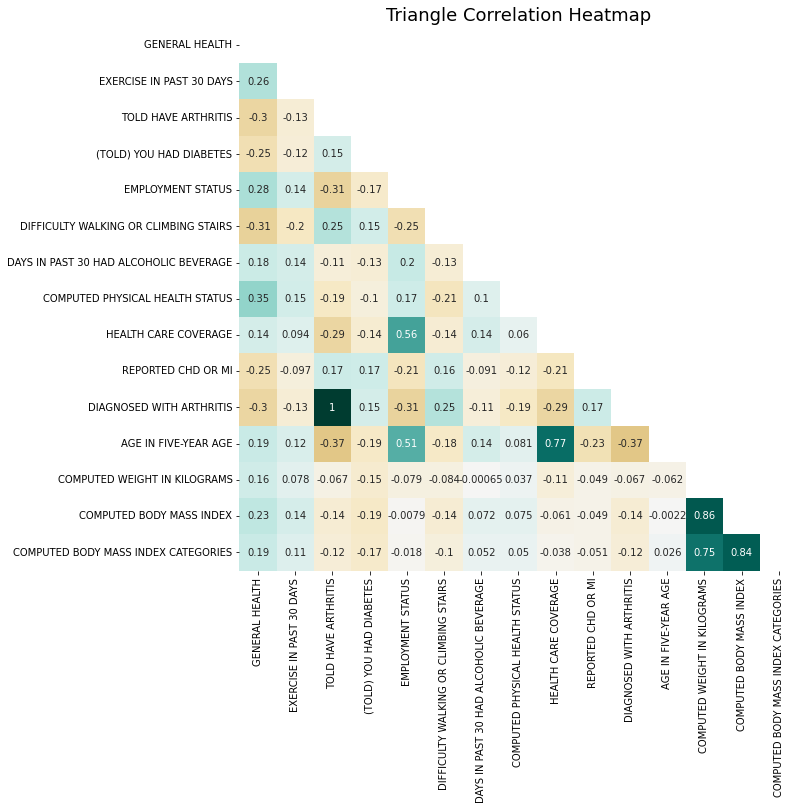

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd_df = pd.DataFrame(_df.collect())
pd_df.columns = ['STATE FIPS CODE',
 'FILE MONTH',
 'INTERVIEW DATE',
 'INTERVIEW MONTH',
 'INTERVIEW DAY',
 'INTERVIEW YEAR',
 'FINAL DISPOSITION',
 'ANNUAL SEQUENCE NUMBER',
 'PRIMARY SAMPLING UNIT',
 'SEX OF RESPONDENT',
 'GENERAL HEALTH',
 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
 'HAVE ANY HEALTH CARE COVERAGE',
 'MULTIPLE HEALTH CARE PROFESSIONALS',
 'COULD NOT SEE DR. BECAUSE OF COST',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'HOW MUCH TIME DO YOU SLEEP',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
 'EVER DIAGNOSED WITH A STROKE',
 'EVER TOLD HAD ASTHMA',
 '(EVER TOLD) YOU HAD SKIN CANCER?',
 '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
 '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
 '(EVER TOLD) YOU HAD DIABETES',
 'LAST VISITED DENTIST OR DENTAL CLINIC',
 'NUMBER OF PERMANENT TEETH REMOVED',
 'MARITAL STATUS',
 'EDUCATION LEVEL',
 'OWN OR RENT HOME',
 'DO YOU HAVE A CELL PHONE FOR PERSONAL USE?',
 'ARE YOU A VETERAN',
 'EMPLOYMENT STATUS',
 'NUMBER OF CHILDREN IN HOUSEHOLD',
 'INCOME LEVEL',
 'REPORTED WEIGHT IN POUNDS',
 'REPORTED HEIGHT IN FEET AND INCHES',
 'ARE YOU DEAF OR DO YOU HAVE SERIOUS DIFFICULTY HEARING?',
 'BLIND OR DIFFICULTY SEEING',
 'DIFFICULTY CONCENTRATING OR REMEMBERING',
 'DIFFICULTY WALKING OR CLIMBING STAIRS',
 'DIFFICULTY DRESSING OR BATHING',
 'DIFFICULTY DOING ERRANDS ALONE',
 'SMOKED AT LEAST 100 CIGARETTES',
 'USE OF SMOKELESS TOBACCO PRODUCTS',
 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
 'ADULT FLU SHOT/SPRAY PAST 12 MOS',
 'PNEUMONIA SHOT EVER',
 'HOW OFTEN USE SEATBELTS IN CAR?',
 'EVER TESTED H.I.V.',
 'DO ANY HIGH RISK SITUATIONS APPLY',
 'QUESTIONNAIRE VERSION IDENTIFIER',
 'LANGUAGE IDENTIFIER',
 'METROPOLITAN STATUS',
 'URBAN/RURAL STATUS',
 'SAMPLE DESIGN STRATIFICATION VARIABLE',
 'STRATUM WEIGHT',
 'RAW WEIGHTING FACTOR USED IN RAKING',
 'DESIGN WEIGHT USED IN RAKING',
 'IMPUTED RACE/ETHNICITY VALUE',
 'DUAL PHONE USE CATEGORIES',
 'TRUNCATED DESIGN WEIGHT USED IN ADULT COMBINED LAN  LINE AND CELL PHONE RAKING',
 'FINAL WEIGHT: LAND-LINE AND CELL-PHONE DATA',
 'ADULTS WITH GOOD OR BETTER HEALTH',
 'COMPUTED PHYSICAL HEALTH STATUS',
 'COMPUTED MENTAL HEALTH STATUS',
 'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE',
 'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
 'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)',
 'LIFETIME ASTHMA CALCULATED VARIABLE',
 'CURRENT ASTHMA CALCULATED VARIABLE',
 'COMPUTED ASTHMA STATUS',
 'RESPONDENTS DIAGNOSED WITH ARTHRITIS',
 'RISK FACTOR FOR HAVING HAD PERMANENT TEETH EXTRACTED',
 'ADULTS WHO HAVE VISITED A DENTIST, DENTAL HYGENIST OR DENTAL CLINIC WITHIN THE PAST YEAR',
 'COMPUTED PREFERRED RACE',
 'CALCULATED NON-HISPANIC RACE INCLUDING MULTIRACIAL',
 'HISPANIC, LATINO/A, OR SPANISH ORIGIN CALCULATED VARIABLE',
 'COMPUTED RACE-ETHNICITY GROUPING',
 'COMPUTED NON-HISPANIC WHITES/ALL OTHERS RACE CATEGORIES RACE/ETHNIC GROUP CODES USED IN POST-STRATIFICATION.',
 'COMPUTED FIVE LEVEL RACE/ETHNICITY CATEGORY.',
 'COMPUTED RACE GROUPS USED FOR INTERNET PREVALENCE TABLES',
 'CALCULATED SEX VARIABLE',
 'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE',
 'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
 'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
 'IMPUTED AGE IN SIX GROUPS',
 'COMPUTED HEIGHT IN INCHES',
 'COMPUTED HEIGHT IN METERS',
 'COMPUTED WEIGHT IN KILOGRAMS',
 'COMPUTED BODY MASS INDEX',
 'COMPUTED BODY MASS INDEX CATEGORIES',
 'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
 'COMPUTED NUMBER OF CHILDREN IN HOUSEHOLD',
 'COMPUTED LEVEL OF EDUCATION COMPLETED CATEGORIES',
 'COMPUTED INCOME CATEGORIES',
 'COMPUTED SMOKING STATUS',
 'CURRENT SMOKING CALCULATED VARIABLE',
 'DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS',
 'COMPUTED DRINK-OCCASIONS-PER-DAY',
 'BINGE DRINKING CALCULATED VARIABLE',
 'COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK',
 'HEAVY ALCOHOL CONSUMPTION  CALCULATED VARIABLE',
 'ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS',
 'ALWAYS WEAR SEAT BELTS',
 'DRINKING AND DRIVING',
 'EVER BEEN TESTED FOR HIV CALCULATED VARIABLE']

corr__ = pd_df.corr()
# diab_label = '(EVER TOLD) YOU HAD DIABETES'
# corr__[diab_label].abs().sort_values(ascending=False).head(50)
correlations = corr__['(EVER TOLD) YOU HAD DIABETES'].abs()
correlations = correlations[correlations>0.1].index.to_list()
hm_df = pd_df[correlations]

list(hm_df.columns)

columns_to_remove = [
'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
'EVER DIAGNOSED WITH HEART ATTACK',
'NUMBER OF PERMANENT TEETH REMOVED',
'PNEUMONIA SHOT EVER', 
'ADULTS WITH GOOD OR BETTER HEALTH',
'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
'IMPUTED AGE IN SIX GROUPS',
# 'COMPUTED BODY MASS INDEX CATEGORIES',
'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
'DRINKING AND DRIVING'
]
# hm_df = pd_df
hm_df.drop(columns_to_remove, axis=1, inplace=True)

# rename long column names
# -------------------------
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
hm_df.rename(columns={'EVER DIAGNOSED WITH HEART ATTACK': 'DIAGNOSED WITH HEART ATTACK'
                      ,'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE': 'DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE'
                      ,'EVER DIAGNOSED WITH A STROKE': 'DIAGNOSED WITH A STROKE'
                      ,'(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?' : '(TOLD) YOU HAD COPD, EMPHYSEMA OR CHRONIC BRONCHITIS?'
                      ,'(EVER TOLD) YOU HAD DIABETES' : '(TOLD) YOU HAD DIABETES'
                      ,'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE' : 'LEISURE TIME PHYSICAL ACTIVITY'
                      ,'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)' : 'REPORTED CHD OR MI'
                      ,'RESPONDENTS DIAGNOSED WITH ARTHRITIS' : 'DIAGNOSED WITH ARTHRITIS'
                      ,'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE' : 'AGE IN FIVE-YEAR AGE'
                      ,'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE' : 'AGE IN TWO AGE GROUPS'
                      ,'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE' : 'HEALTH CARE COVERAGE'}
                      , inplace=True)



plt.figure(figsize=(10, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(hm_df.corr(), dtype=bool))
heatmap = sns.heatmap(hm_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', cbar=False)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18});

# hm_df